In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [48]:
data_batdongsan = pd.read_csv('./data_sources/batdongsan_data.csv')
data_thuviennhadat = pd.read_csv('./data_sources/thuviennhadat_data.csv')
data_chotot = pd.read_csv('./data_sources/chotot_data.csv')

data_describe_batdongsan = pd.read_csv('./data_sources/batdongsan_describe_extracted.csv')
data_describe_thuviennhadat = pd.read_csv('./data_sources/thuviennhadat_describe_extracted.csv')
# data_describe_thuviennhadat = pd.read_csv('./data_sources/thuviennhadat_describe_extracted.csv', engine='python', on_bad_lines='skip')
data_describe_chotot = pd.read_csv('./data_sources/chotot_describe_extracted.csv')

data_address_batdongsan = pd.read_csv('./data_sources/parsed_batdongsan_addresses.csv')
data_address_thuviennhadat = pd.read_csv('./data_sources/parsed_thuviennhadat_addresses.csv')
data_address_chotot = pd.read_csv('./data_sources/parsed_chotot_addresses.csv')

In [45]:
data_describe_thuviennhadat['gender_requirement'].value_counts()
data_describe_thuviennhadat['room_type'].value_counts(dropna=False)

room_type
ph√≤ng tr·ªç         615
NaN               372
chung c∆∞ mini     130
ph√≤ng kh√©p k√≠n     68
ph√≤ng gh√©p         12
Name: count, dtype: int64

In [107]:
data_describe_batdongsan['gender_requirement'].value_counts()
data_describe_batdongsan['room_type'].value_counts(dropna=False)

room_type
NaN               43
ph√≤ng tr·ªç         42
chung c∆∞ mini     25
ph√≤ng kh√©p k√≠n     4
Name: count, dtype: int64

## **DATA PREPARATION**

### **FILE VERIFIED (batdongsan, thuviennhadat)**

In [343]:
data_verified = pd.read_csv('./not_final_data_verified.csv')
data_verified.head(3)

merge_file_id source_post  \
0   p1-l0_20250320-000509  batdongsan   
1  p1-l10_20250320-000536  batdongsan   
2  p1-l11_20250320-000536  batdongsan   

                                                link  \
0  https://batdongsan.com.vn/cho-thue-nha-tro-pho...   
1  https://batdongsan.com.vn/cho-thue-nha-tro-pho...   
2  https://batdongsan.com.vn/cho-thue-nha-tro-pho...   

                                               title    price  area  \
0  Khai tr∆∞∆°ng ph√≤ng Nguy·ªÖn Duy Trinh gi√° 3tr8.Ch...  3800000  22.0   
1  \n                    Ch√≠nh ch·ªß cho thu√™ ph√≤ng...  5900000  35.0   
2  \n                    Khai tr∆∞∆°ng CHDV full n·ªô...  7000000  40.0   

  start_post_day end_post_day  \
0     2025-03-18   2025-04-02   
1     2025-03-06   2025-04-05   
2     2025-03-19   2025-03-29   

                                            describe  \
0  \n                Ph√≤ng cho thu√™ t·∫°i Qu·∫≠n 2, H...   
1  \n                    Ph√≤ng tr·ªç n·∫±m ·ªü 15B/105 ...   
2  \n                    T√¥ Hi·∫øn Th√†nh, P13, Q10....   

                                             address province/city district  \
0  ƒê∆∞·ªùng Nguy·ªÖn Duy Trinh, Ph∆∞·ªùng B√¨nh Tr∆∞ng ƒê√¥ng...   H·ªì Ch√≠ Minh   Qu·∫≠n 2   
1  15B/105 ƒê∆∞·ªùng L√™ Th√°nh T√¥n, Ph∆∞·ªùng B·∫øn Ngh√©, Q...   H·ªì Ch√≠ Minh   Qu·∫≠n 1   
2  ƒê∆∞·ªùng T√¥ Hi·∫øn Th√†nh, Ph∆∞·ªùng 13, Qu·∫≠n 10, H·ªì Ch...   H·ªì Ch√≠ Minh  Qu·∫≠n 10   

                     ward                      street house_number  
0  Ph∆∞·ªùng B√¨nh Tr∆∞ng ƒê√¥ng      ƒê∆∞·ªùng Nguy·ªÖn Duy Trinh          NaN  
1         Ph∆∞·ªùng B·∫øn Ngh√©  15B/105 ƒê∆∞·ªùng L√™ Th√°nh T√¥n          NaN  
2               Ph∆∞·ªùng 13         ƒê∆∞·ªùng T√¥ Hi·∫øn Th√†nh          NaN

In [345]:
data_verified.drop(columns=['start_post_day', 'end_post_day'], inplace=True)

In [348]:
data_verified.columns

Index(['merge_file_id', 'source_post', 'link', 'title', 'price', 'area',
       'describe', 'address', 'province/city', 'district', 'ward', 'street',
       'house_number'],
      dtype='object')

In [349]:
data_verified.columns = [
    'merge_file_id', 'source_post', 'link', 'title', 'price', 'area',
    'describe', 'address', 'province_city', 'district', 'ward', 'street',
    'house_number'
]

In [350]:
data_verified = data_verified.apply(lambda x: x.strip() if isinstance(x, str) else x)

In [351]:
data_verified.to_csv('final_data_verified.csv', index=False)

### **FILE UNVERIFIED (chotot)**

In [353]:
data_unverified = pd.read_csv('./data_sources/data_unverified_missing.csv')
data_unverified.head(3)

merge_file_id source_post  \
0    p1-l11_20250404-155753      chotot   
1  p135-l14_20250404-172843      chotot   
2    p30-l2_20250404-160805      chotot   

                                                link  \
0  https://www.nhatot.com/thue-phong-tro-quan-5-t...   
1  https://www.nhatot.com/thue-phong-tro-huyen-nh...   
2  https://www.nhatot.com/thue-phong-tro-quan-7-t...   

                                               title            price   area  \
0                      Ph√≤ng cao c·∫•p m·ªõi x√¢y Cao ƒê·∫°t  5,4 tri·ªáu/th√°ng  16 m¬≤   
1  DUPLEX ƒê·ªß N·ªôi Th·∫•t R·ªông G√°c Cao G·∫ßn TDTU, RMIT...  4,2 tri·ªáu/th√°ng  30 m¬≤   
2  Cho thu√™ ph√≤ng tr·ªç c√≥ g√°c. Ngay KDC Nam Long #...  3,7 tri·ªáu/th√°ng  25 m¬≤   

                                             address  \
0    ƒê∆∞·ªùng Cao ƒê·∫°t, Ph∆∞·ªùng 1, Qu·∫≠n 5, Tp H·ªì Ch√≠ Minh   
1  ƒê∆∞·ªùng Tr·∫ßn Th·ªã Li·ªÅn, X√£ Ph∆∞·ªõc Ki·ªÉn, Huy·ªán Nh√† ...   
2  ƒê∆∞·ªùng Hu·ª≥nh T·∫•n Ph√°t, Ph∆∞·ªùng T√¢n Thu·∫≠n ƒê√¥ng, Q...   

                                            describe  
0  ‚ú®Ph√≤ng  N·ªòI TH·∫§T Cao C·∫•p Q5\nAddress: Cao ƒê·∫°t ...  
1  M√¨nh ƒëang tr·ªëng 2 ph√≤ng ƒë·ªß n·ªôi th·∫•t, ph√≤ng r·ªôn...  
2  Cho thu√™ ph√≤ng tr·ªç gi√° c√≥ g√°c, c√≥ c·ª≠a s·ªï. Tho√°...

In [354]:
data_unverified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   merge_file_id  745 non-null    object
 1   source_post    745 non-null    object
 2   link           745 non-null    object
 3   title          745 non-null    object
 4   price          745 non-null    object
 5   area           745 non-null    object
 6   address        745 non-null    object
 7   describe       745 non-null    object
dtypes: object(8)
memory usage: 46.7+ KB


In [355]:
data_unverified.nunique()

merge_file_id    745
source_post        1
link             745
title            745
price             69
area              29
address          418
describe         736
dtype: int64

In [179]:
data_unverified['price'].value_counts()

price
4 tri·ªáu/th√°ng       54
3,8 tri·ªáu/th√°ng     43
3,5 tri·ªáu/th√°ng     42
4,5 tri·ªáu/th√°ng     40
5 tri·ªáu/th√°ng       36
3,2 tri·ªáu/th√°ng     31
6,5 tri·ªáu/th√°ng     28
3 tri·ªáu/th√°ng       28
3,7 tri·ªáu/th√°ng     27
3,3 tri·ªáu/th√°ng     24
5,5 tri·ªáu/th√°ng     23
6 tri·ªáu/th√°ng       22
4,8 tri·ªáu/th√°ng     22
4,2 tri·ªáu/th√°ng     21
7 tri·ªáu/th√°ng       19
3,6 tri·ªáu/th√°ng     18
4,7 tri·ªáu/th√°ng     17
3,9 tri·ªáu/th√°ng     16
3,4 tri·ªáu/th√°ng     16
4,9 tri·ªáu/th√°ng     15
4,3 tri·ªáu/th√°ng     14
800000 ƒë/th√°ng      13
4,6 tri·ªáu/th√°ng     10
2,5 tri·ªáu/th√°ng      9
4,4 tri·ªáu/th√°ng      8
3,1 tri·ªáu/th√°ng      7
6,2 tri·ªáu/th√°ng      7
5,2 tri·ªáu/th√°ng      7
2,6 tri·ªáu/th√°ng      7
6,8 tri·ªáu/th√°ng      7
4,1 tri·ªáu/th√°ng      7
5,8 tri·ªáu/th√°ng      7
2,3 tri·ªáu/th√°ng      6
2,4 tri·ªáu/th√°ng      6
7,5 tri·ªáu/th√°ng      6
6,6 tri·ªáu/th√°ng      5
2,8 tri·ªáu/th√°ng      5
5,7 tri·ªáu/th√°ng      5
2,9 tri

In [356]:
data_unverified[~data_unverified['price'].str.contains('tri·ªáu/th√°ng')]['price'].value_counts()

price
800000 ƒë/th√°ng    13
950000 ƒë/th√°ng     1
Name: count, dtype: int64

In [357]:
# Xu li ƒë/th√°ng
data_unverified.loc[data_unverified['price'].str.contains('ƒë/th√°ng', na=False), 'price'] = '0,' + data_unverified.loc[data_unverified['price'].str.contains('ƒë/th√°ng', na=False), 'price'].str.replace('ƒë/th√°ng', 'tri·ªáu/th√°ng', regex=False)

# Tach so ra
data_unverified['price'] = data_unverified['price'].str.replace(',', '.').str.extract(r'([\d\.]+)')

# Chuyen type float64
data_unverified['price'] = data_unverified['price'].astype('float64')
data_unverified['price'] = data_unverified['price'] * 1000000

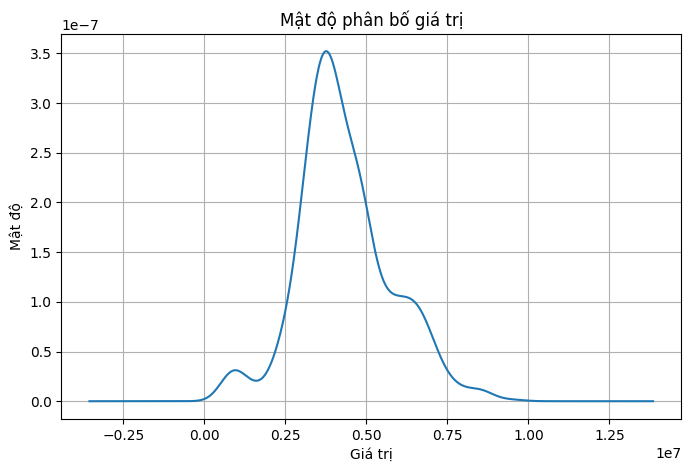

In [358]:
plt.figure(figsize=(8, 5))
data_unverified['price'].plot(kind='density')

plt.title('M·∫≠t ƒë·ªô ph√¢n b·ªë gi√° tr·ªã')
plt.xlabel('Gi√° tr·ªã')
plt.ylabel('M·∫≠t ƒë·ªô')
plt.grid(True)
plt.show()

In [183]:
data_unverified['area'].value_counts()

area
25 m¬≤     233
30 m¬≤     137
20 m¬≤     105
35 m¬≤      78
40 m¬≤      30
28 m¬≤      27
15 m¬≤      16
27 m¬≤      15
22 m¬≤      15
24 m¬≤      14
18 m¬≤      13
23 m¬≤      10
26 m¬≤      10
32 m¬≤       8
50 m¬≤       5
45 m¬≤       5
38 m¬≤       4
70 m¬≤       3
60 m¬≤       3
16 m¬≤       2
21 m¬≤       2
34 m¬≤       2
80 m¬≤       2
48 m¬≤       1
17 m¬≤       1
36 m¬≤       1
200 m¬≤      1
100 m¬≤      1
19 m¬≤       1
Name: count, dtype: int64

In [359]:
data_unverified['area'] = data_unverified['area'].str.extract(r'(\d+)')
data_unverified['area'] = data_unverified['area'].astype('float64')

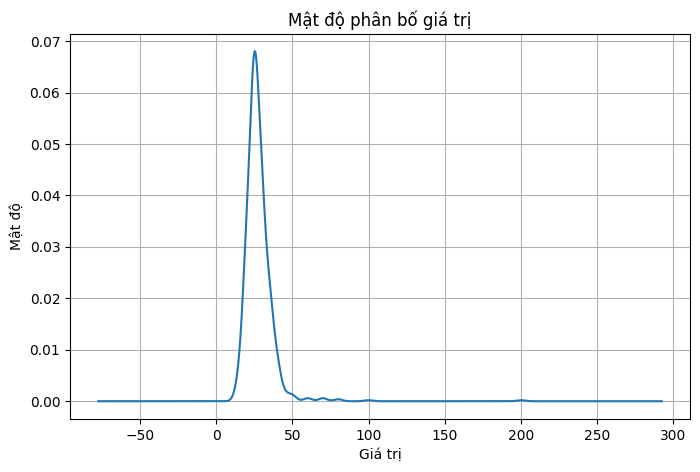

In [185]:
plt.figure(figsize=(8, 5))
data_unverified['area'].plot(kind='density')

plt.title('M·∫≠t ƒë·ªô ph√¢n b·ªë gi√° tr·ªã')
plt.xlabel('Gi√° tr·ªã')
plt.ylabel('M·∫≠t ƒë·ªô')
plt.grid(True)
plt.show()

In [360]:
pd.set_option('display.max_rows', None)
data_unverified['address'].value_counts()

address
ƒê∆∞·ªùng H√≤a B√¨nh, Ph∆∞·ªùng 3, Qu·∫≠n 11, Tp H·ªì Ch√≠ Minh                                                   20
ƒê∆∞·ªùng L·∫°c Long Qu√¢n, Ph∆∞·ªùng 5, Qu·∫≠n 11, Tp H·ªì Ch√≠ Minh                                              14
ƒê∆∞·ªùng L√™ H·ªìng Phong, Ph∆∞·ªùng 2, Qu·∫≠n 10, Tp H·ªì Ch√≠ Minh                                              12
C·∫ßu Nguy·ªÖn Tri Ph∆∞∆°ng, Ph∆∞·ªùng 6, Qu·∫≠n 5, Tp H·ªì Ch√≠ Minh                                             10
ƒê∆∞·ªùng L√Ω Chi√™u Ho√†ng, Ph∆∞·ªùng 10, Qu·∫≠n 6, Tp H·ªì Ch√≠ Minh                                              9
ƒê∆∞·ªùng V√µ VƒÉn Ki·ªát, Ph∆∞·ªùng 13, Qu·∫≠n 5, Tp H·ªì Ch√≠ Minh                                                 8
ƒê∆∞·ªùng L√Ω Th∆∞·ªùng Ki·ªát, Ph∆∞·ªùng 14, Qu·∫≠n 10, Tp H·ªì Ch√≠ Minh                                             8
ƒê∆∞·ªùng An D∆∞∆°ng V∆∞∆°ng, Ph∆∞·ªùng 9, Qu·∫≠n 5, Tp H·ªì Ch√≠ Minh                                               7
ƒê∆∞·ªùng L√™ VƒÉn S·ªπ, Ph∆∞·ªùng 12, Qu·∫≠n

In [361]:
parts = data_unverified['address'].str.split(', ')
parts = parts.apply(lambda x: x[::-1])

In [362]:
address_extracted = pd.DataFrame(list(parts), columns=['province_city', 'district', 'ward', 'street', 'house_number'])

In [363]:
address_extracted = address_extracted.apply(lambda x: x.title() if isinstance(x, str) else x)

In [ ]:
address_extracted.isna().sum()

In [190]:
address_extracted.nunique()

province_city      1
district          11
ward              55
street           240
house_number      66
dtype: int64

In [191]:
address_extracted['district'].value_counts()

district
Qu·∫≠n 5              140
Qu·∫≠n 10             124
Qu·∫≠n 6               95
Qu·∫≠n 3               88
Qu·∫≠n 11              80
Qu·∫≠n 1               62
Qu·∫≠n 7               61
Qu·∫≠n 12              43
Qu·∫≠n 4               29
Huy·ªán B√¨nh Ch√°nh     15
Huy·ªán Nh√† B√®          8
Name: count, dtype: int64

In [192]:
address_extracted['ward'].value_counts(ascending=True)

ward
Ph∆∞·ªùng Th·∫°nh Xu√¢n           1
Ph∆∞·ªùng T√¢n H∆∞ng Thu·∫≠n       1
X√£ Ph√∫ Xu√¢n                 1
Ph∆∞·ªùng T√¢n Phong            1
                            1
Ph∆∞·ªùng T√¢n Th·ªõi Hi·ªáp        1
Ph∆∞·ªùng Nguy·ªÖn Th√°i B√¨nh     1
Th·ªã tr·∫•n Nh√† B√®             2
Ph∆∞·ªùng Ph√∫ M·ªπ               2
Ph∆∞·ªùng Hi·ªáp Th√†nh           2
Ph∆∞·ªùng T√¢n Ch√°nh Hi·ªáp       2
Ph∆∞·ªùng T√¢n Thu·∫≠n T√¢y        3
Ph∆∞·ªùng Ph·∫°m Ng≈© L√£o         3
Ph∆∞·ªùng Th·ªõi An              3
Ph∆∞·ªùng C·∫ßu √îng L√£nh         3
Ph∆∞·ªùng T√¢n H∆∞ng             3
Ph∆∞·ªùng 16                   4
Ph∆∞·ªùng T√¢n Th·ªõi Nh·∫•t        4
Ph∆∞·ªùng T√¢n Ki·ªÉng            4
X√£ Phong Ph√∫                4
Ph∆∞·ªùng ƒê√¥ng H∆∞ng Thu·∫≠n      4
Ph∆∞·ªùng 18                   4
Ph∆∞·ªùng C√¥ Giang             4
Ph∆∞·ªùng T√¢n Thu·∫≠n ƒê√¥ng       4
X√£ Ph∆∞·ªõc Ki·ªÉn               5
Ph∆∞·ªùng C·∫ßu Kho              6
Ph∆∞·ªùng B·∫øn Ngh√©             6
Ph∆∞·ªùng T√¢n Ph√∫              6


In [193]:
address_extracted['street'].value_counts(ascending=True)

street
th·∫°nh xu√¢n 22                                 1
ƒê∆∞·ªùng ƒê√¥ng H∆∞ng Thu·∫≠n 42                      1
Nguy·ªÖn VƒÉn Linh                               1
ƒê∆∞·ªùng Tr·∫ßn Nh√¢n T√¥n                           1
ƒê∆∞·ªùng Th√°i Phi√™n                              1
H·∫ªm 353 ƒê∆∞·ªùng Ph·∫°m Ng≈© L√£o                    1
ƒê∆∞·ªùng s·ªë 3                                    1
H·∫ªm 118 ƒê∆∞·ªùng Nguy·ªÖn Th·ªã Th·∫≠p                 1
ƒê∆∞·ªùng T√¢n Th·ªõi Nh·∫•t 5                         1
ƒê∆∞·ªùng K√Ω H√≤a                                  1
ƒê∆∞·ªùng Ng√£ B·∫£y L√Ω Th√°i T·ªï                      1
C·∫ßu v∆∞·ª£t Quang Trung 2                        1
ƒê∆∞·ªùng S·ªë 52                                   1
Thi√™n Ph∆∞·ªõc                                   1
ƒê∆∞·ªùng V√µ Th·ªã Ph·∫£i                             1
ƒê∆∞·ªùng ƒêinh Ti√™n Ho√†ng                         1
ƒê∆∞·ªùng L√™ VƒÉn Kh∆∞∆°ng                           1
H√†m Nghi                                      1
ƒê∆∞·ª

In [364]:
final_data_unverified = pd.concat([data_unverified, address_extracted], axis=1)

In [365]:
final_data_unverified.head(5)

merge_file_id source_post  \
0    p1-l11_20250404-155753      chotot   
1  p135-l14_20250404-172843      chotot   
2    p30-l2_20250404-160805      chotot   
3   p141-l7_20250404-172843      chotot   
4    p1-l15_20250404-155753      chotot   

                                                link  \
0  https://www.nhatot.com/thue-phong-tro-quan-5-t...   
1  https://www.nhatot.com/thue-phong-tro-huyen-nh...   
2  https://www.nhatot.com/thue-phong-tro-quan-7-t...   
3  https://www.nhatot.com/thue-phong-tro-quan-11-...   
4  https://www.nhatot.com/thue-phong-tro-quan-10-...   

                                               title      price  area  \
0                      Ph√≤ng cao c·∫•p m·ªõi x√¢y Cao ƒê·∫°t  5400000.0  16.0   
1  DUPLEX ƒê·ªß N·ªôi Th·∫•t R·ªông G√°c Cao G·∫ßn TDTU, RMIT...  4200000.0  30.0   
2  Cho thu√™ ph√≤ng tr·ªç c√≥ g√°c. Ngay KDC Nam Long #...  3700000.0  25.0   
3  PH√íNG TR·ªå GI√Å SI√äU R·∫∫ G·∫¶N ƒê·∫¶M SEN  - ƒê·∫†I H·ªåC V...  2700000.0  25.0   
4  üè†CHO THU√ä 1 PH√íNG NG·ª¶ M·ªöI 100% S√ÅT QU·∫¨N 10_C·ª¨A...  5200000.0  30.0   

                                             address  \
0    ƒê∆∞·ªùng Cao ƒê·∫°t, Ph∆∞·ªùng 1, Qu·∫≠n 5, Tp H·ªì Ch√≠ Minh   
1  ƒê∆∞·ªùng Tr·∫ßn Th·ªã Li·ªÅn, X√£ Ph∆∞·ªõc Ki·ªÉn, Huy·ªán Nh√† ...   
2  ƒê∆∞·ªùng Hu·ª≥nh T·∫•n Ph√°t, Ph∆∞·ªùng T√¢n Thu·∫≠n ƒê√¥ng, Q...   
3  ƒê∆∞·ªùng H√≤a B√¨nh, Ph∆∞·ªùng 3, Qu·∫≠n 11, Tp H·ªì Ch√≠ Minh   
4  ƒê∆∞·ªùng L√Ω Th∆∞·ªùng Ki·ªát, Ph∆∞·ªùng 15, Qu·∫≠n 10, Tp H...   

                                            describe   province_city  \
0  ‚ú®Ph√≤ng  N·ªòI TH·∫§T Cao C·∫•p Q5\nAddress: Cao ƒê·∫°t ...  Tp H·ªì Ch√≠ Minh   
1  M√¨nh ƒëang tr·ªëng 2 ph√≤ng ƒë·ªß n·ªôi th·∫•t, ph√≤ng r·ªôn...  Tp H·ªì Ch√≠ Minh   
2  Cho thu√™ ph√≤ng tr·ªç gi√° c√≥ g√°c, c√≥ c·ª≠a s·ªï. Tho√°...  Tp H·ªì Ch√≠ Minh   
3  V·ªã Tr√≠: ƒê∆∞·ªùng Ho√† b√¨nh, g·∫ßn Lu·ªπ B√°n B√≠ch, √Çu C...  Tp H·ªì Ch√≠ Minh   
4  V·ªã Tr√≠ : L√Ω Th∆∞·ªùng Ki·ªát - Qu·∫≠n 10 \n( G·∫ßn ƒêH B...  Tp H·ªì Ch√≠ Minh   

       district                   ward                street house_number  
0        Qu·∫≠n 5               Ph∆∞·ªùng 1         ƒê∆∞·ªùng Cao ƒê·∫°t         None  
1  Huy·ªán Nh√† B√®          X√£ Ph∆∞·ªõc Ki·ªÉn   ƒê∆∞·ªùng Tr·∫ßn Th·ªã Li·ªÅn         None  
2        Qu·∫≠n 7  Ph∆∞·ªùng T√¢n Thu·∫≠n ƒê√¥ng  ƒê∆∞·ªùng Hu·ª≥nh T·∫•n Ph√°t         None  
3       Qu·∫≠n 11               Ph∆∞·ªùng 3        ƒê∆∞·ªùng H√≤a B√¨nh         None  
4       Qu·∫≠n 10              Ph∆∞·ªùng 15  ƒê∆∞·ªùng L√Ω Th∆∞·ªùng Ki·ªát         None

In [199]:
final_data_unverified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   merge_file_id  745 non-null    object 
 1   source_post    745 non-null    object 
 2   link           745 non-null    object 
 3   title          745 non-null    object 
 4   price          745 non-null    float64
 5   area           745 non-null    float64
 6   address        745 non-null    object 
 7   describe       745 non-null    object 
 8   province_city  745 non-null    object 
 9   district       745 non-null    object 
 10  ward           745 non-null    object 
 11  street         745 non-null    object 
 12  house_number   83 non-null     object 
dtypes: float64(2), object(11)
memory usage: 75.8+ KB


In [366]:
final_data_unverified = final_data_unverified.apply(lambda x: x.strip() if isinstance(x, str) else x)

In [367]:
# khong tim dc li do, page source describe k ghi, link da die
final_data_unverified[final_data_unverified['ward'] == '']

merge_file_id source_post  \
272  p167-l5_20250404-173602      chotot   

                                                  link  \
272  https://www.nhatot.com/thue-phong-tro-quan-6-t...   

                                                 title      price  area  \
272  üè°PH√íNG TR·ªå FULL N·ªòI TH·∫§T ·ªû S√ÅT R·∫†P PHIM GALAXY...  3700000.0  25.0   

                                              address  \
272  ƒê∆∞·ªùng Kinh D∆∞∆°ng V∆∞∆°ng, , Qu·∫≠n 6, Tp H·ªì Ch√≠ Minh   

                                              describe   province_city  \
272  ‚ú®TR·ªêNG RA 1 PH√íNG TR·ªå GI√Å M·ªÄM FULL N·ªòI TH·∫§T ·ªû ...  Tp H·ªì Ch√≠ Minh   

    district ward                  street house_number  
272   Qu·∫≠n 6       ƒê∆∞·ªùng Kinh D∆∞∆°ng V∆∞∆°ng         None

In [368]:
# Delete row
final_data_unverified = final_data_unverified[final_data_unverified['ward'] != '']

In [369]:
final_data_unverified.to_csv('final_data_unverified.csv', index=False)

### **MERGE DATA**

In [370]:
data_verified = pd.read_csv('final_data_verified.csv')
data_unverified = pd.read_csv('final_data_unverified.csv')

In [371]:
data_verified.head(3)

merge_file_id source_post  \
0   p1-l0_20250320-000509  batdongsan   
1  p1-l10_20250320-000536  batdongsan   
2  p1-l11_20250320-000536  batdongsan   

                                                link  \
0  https://batdongsan.com.vn/cho-thue-nha-tro-pho...   
1  https://batdongsan.com.vn/cho-thue-nha-tro-pho...   
2  https://batdongsan.com.vn/cho-thue-nha-tro-pho...   

                                               title    price  area  \
0  Khai tr∆∞∆°ng ph√≤ng Nguy·ªÖn Duy Trinh gi√° 3tr8.Ch...  3800000  22.0   
1  \n                    Ch√≠nh ch·ªß cho thu√™ ph√≤ng...  5900000  35.0   
2  \n                    Khai tr∆∞∆°ng CHDV full n·ªô...  7000000  40.0   

                                            describe  \
0  \n                Ph√≤ng cho thu√™ t·∫°i Qu·∫≠n 2, H...   
1  \n                    Ph√≤ng tr·ªç n·∫±m ·ªü 15B/105 ...   
2  \n                    T√¥ Hi·∫øn Th√†nh, P13, Q10....   

                                             address province_city district  \
0  ƒê∆∞·ªùng Nguy·ªÖn Duy Trinh, Ph∆∞·ªùng B√¨nh Tr∆∞ng ƒê√¥ng...   H·ªì Ch√≠ Minh   Qu·∫≠n 2   
1  15B/105 ƒê∆∞·ªùng L√™ Th√°nh T√¥n, Ph∆∞·ªùng B·∫øn Ngh√©, Q...   H·ªì Ch√≠ Minh   Qu·∫≠n 1   
2  ƒê∆∞·ªùng T√¥ Hi·∫øn Th√†nh, Ph∆∞·ªùng 13, Qu·∫≠n 10, H·ªì Ch...   H·ªì Ch√≠ Minh  Qu·∫≠n 10   

                     ward                      street house_number  
0  Ph∆∞·ªùng B√¨nh Tr∆∞ng ƒê√¥ng      ƒê∆∞·ªùng Nguy·ªÖn Duy Trinh          NaN  
1         Ph∆∞·ªùng B·∫øn Ngh√©  15B/105 ƒê∆∞·ªùng L√™ Th√°nh T√¥n          NaN  
2               Ph∆∞·ªùng 13         ƒê∆∞·ªùng T√¥ Hi·∫øn Th√†nh          NaN

In [372]:
data_unverified.head(3)

merge_file_id source_post  \
0    p1-l11_20250404-155753      chotot   
1  p135-l14_20250404-172843      chotot   
2    p30-l2_20250404-160805      chotot   

                                                link  \
0  https://www.nhatot.com/thue-phong-tro-quan-5-t...   
1  https://www.nhatot.com/thue-phong-tro-huyen-nh...   
2  https://www.nhatot.com/thue-phong-tro-quan-7-t...   

                                               title      price  area  \
0                      Ph√≤ng cao c·∫•p m·ªõi x√¢y Cao ƒê·∫°t  5400000.0  16.0   
1  DUPLEX ƒê·ªß N·ªôi Th·∫•t R·ªông G√°c Cao G·∫ßn TDTU, RMIT...  4200000.0  30.0   
2  Cho thu√™ ph√≤ng tr·ªç c√≥ g√°c. Ngay KDC Nam Long #...  3700000.0  25.0   

                                             address  \
0    ƒê∆∞·ªùng Cao ƒê·∫°t, Ph∆∞·ªùng 1, Qu·∫≠n 5, Tp H·ªì Ch√≠ Minh   
1  ƒê∆∞·ªùng Tr·∫ßn Th·ªã Li·ªÅn, X√£ Ph∆∞·ªõc Ki·ªÉn, Huy·ªán Nh√† ...   
2  ƒê∆∞·ªùng Hu·ª≥nh T·∫•n Ph√°t, Ph∆∞·ªùng T√¢n Thu·∫≠n ƒê√¥ng, Q...   

                                            describe   province_city  \
0  ‚ú®Ph√≤ng  N·ªòI TH·∫§T Cao C·∫•p Q5\nAddress: Cao ƒê·∫°t ...  Tp H·ªì Ch√≠ Minh   
1  M√¨nh ƒëang tr·ªëng 2 ph√≤ng ƒë·ªß n·ªôi th·∫•t, ph√≤ng r·ªôn...  Tp H·ªì Ch√≠ Minh   
2  Cho thu√™ ph√≤ng tr·ªç gi√° c√≥ g√°c, c√≥ c·ª≠a s·ªï. Tho√°...  Tp H·ªì Ch√≠ Minh   

       district                   ward                street house_number  
0        Qu·∫≠n 5               Ph∆∞·ªùng 1         ƒê∆∞·ªùng Cao ƒê·∫°t          NaN  
1  Huy·ªán Nh√† B√®          X√£ Ph∆∞·ªõc Ki·ªÉn   ƒê∆∞·ªùng Tr·∫ßn Th·ªã Li·ªÅn          NaN  
2        Qu·∫≠n 7  Ph∆∞·ªùng T√¢n Thu·∫≠n ƒê√¥ng  ƒê∆∞·ªùng Hu·ª≥nh T·∫•n Ph√°t          NaN

In [373]:
data = pd.concat([data_verified, data_unverified])

In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1967 entries, 0 to 743
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   merge_file_id  1967 non-null   object 
 1   source_post    1967 non-null   object 
 2   link           1967 non-null   object 
 3   title          1967 non-null   object 
 4   price          1967 non-null   float64
 5   area           1967 non-null   float64
 6   describe       1967 non-null   object 
 7   address        1967 non-null   object 
 8   province_city  1967 non-null   object 
 9   district       1967 non-null   object 
 10  ward           1967 non-null   object 
 11  street         854 non-null    object 
 12  house_number   94 non-null     object 
dtypes: float64(2), object(11)
memory usage: 215.1+ KB


In [375]:
data['province_city'].value_counts()

province_city
H·ªì Ch√≠ Minh       1222
Tp H·ªì Ch√≠ Minh     744
H·ªì Ch√≠ Minh ko       1
Name: count, dtype: int64

In [376]:
data.loc[data['province_city'] == 'Tp H·ªì Ch√≠ Minh', ['province_city']] = 'H·ªì Ch√≠ Minh'
data.loc[data['province_city'] == 'H·ªì Ch√≠ Minh ko', ['province_city']] = 'H·ªì Ch√≠ Minh'

In [377]:
data['district'].value_counts().sort_index()

district
B√¨nh Ch√°nh             1
B√¨nh Th·∫°nh            20
G√≤ V·∫•p                11
Huy·ªán B√¨nh Ch√°nh      26
Huy·ªán H√≥c M√¥n          7
Huy·ªán Nh√† B√®          12
Ph√∫ Nhu·∫≠n              3
Qu·∫≠n 1               107
Qu·∫≠n 10              171
Qu·∫≠n 11               91
Qu·∫≠n 12              108
Qu·∫≠n 2                 9
Qu·∫≠n 3               135
Qu·∫≠n 4                59
Qu·∫≠n 5               180
Qu·∫≠n 6               113
Qu·∫≠n 7               180
Qu·∫≠n 8                62
Qu·∫≠n 9                11
Qu·∫≠n B√¨nh Th·∫°nh       90
Qu·∫≠n B√¨nh T√¢n         62
Qu·∫≠n G√≤ V·∫•p          117
Qu·∫≠n Ph√∫ Nhu·∫≠n        39
Qu·∫≠n T√¢n B√¨nh        155
Qu·∫≠n T√¢n Ph√∫          80
Th√†nh ph·ªë Th·ªß ƒê·ª©c    100
Th·ªß ƒê·ª©c                4
T√¢n B√¨nh              13
T√¢n Ph√∫                1
Name: count, dtype: int64

In [378]:
data['district'] = data['district'].str.replace(r'(Qu·∫≠n|Huy·ªán|Th√†nh ph·ªë)', '', regex=True).str.strip()

In [379]:
# Qu·∫≠n 2, qu·∫≠n 9 s√°t nh·∫≠p Th·ªß ƒê·ª©c
data.loc[(data['district'] == '2') | ((data['district'] == '9')), ['district']] = 'Th·ªß ƒê·ª©c'

In [380]:
data['district'].value_counts().sort_index()

district
1             107
10            171
11             91
12            108
3             135
4              59
5             180
6             113
7             180
8              62
B√¨nh Ch√°nh     27
B√¨nh Th·∫°nh    110
B√¨nh T√¢n       62
G√≤ V·∫•p        128
H√≥c M√¥n         7
Nh√† B√®         12
Ph√∫ Nhu·∫≠n      42
Th·ªß ƒê·ª©c       124
T√¢n B√¨nh      168
T√¢n Ph√∫        81
Name: count, dtype: int64

In [381]:
data['ward'].value_counts().sort_index()

ward
Ph∆∞·ªùng  Th·∫°nh M·ªπ L·ª£i         1
Ph∆∞·ªùng 1                    75
Ph∆∞·ªùng 10                   84
Ph∆∞·ªùng 11                   66
Ph∆∞·ªùng 12                   96
Ph∆∞·ªùng 13                  131
Ph∆∞·ªùng 14                  143
Ph∆∞·ªùng 15                   65
Ph∆∞·ªùng 16                   15
Ph∆∞·ªùng 17                    3
Ph∆∞·ªùng 18                    4
Ph∆∞·ªùng 19                    7
Ph∆∞·ªùng 2                    95
Ph∆∞·ªùng 21                    1
Ph∆∞·ªùng 22                    7
Ph∆∞·ªùng 24                    7
Ph∆∞·ªùng 25                   16
Ph∆∞·ªùng 26                   12
Ph∆∞·ªùng 3                    81
Ph∆∞·ªùng 4                    57
Ph∆∞·ªùng 5                    72
Ph∆∞·ªùng 6                    58
Ph∆∞·ªùng 7                    30
Ph∆∞·ªùng 8                    31
Ph∆∞·ªùng 9                    68
Ph∆∞·ªùng An Kh√°nh              7
Ph∆∞·ªùng An L·∫°c                4
Ph∆∞·ªùng An L·∫°c A              2
Ph∆∞·ªùng An Ph√∫               

In [382]:
data['ward'] = data['ward'].str.replace(r'(Ph∆∞·ªùng|X√£|Th·ªã tr·∫•n)', '', regex=True).str.strip()

In [383]:
data['price'] = data['price'] / 1000000

In [384]:
data['price'].value_counts()

price
3.500000      129
4.000000      127
4.500000      100
3.000000       91
5.000000       78
3.800000       75
2.500000       68
3.200000       65
2.800000       53
4.200000       53
5.500000       51
6.500000       50
6.000000       47
3.300000       46
3.600000       45
3.700000       45
7.000000       42
3.900000       38
4.300000       36
4.800000       36
2.000000       34
3.400000       31
2.600000       30
4.900000       27
4.700000       24
4.600000       20
2.200000       19
1.600000       18
2.400000       18
0.800000       18
6.800000       17
4.400000       17
3.100000       17
5.200000       17
1.500000       16
2.300000       16
2.700000       15
8.000000       15
5.700000       14
7.500000       14
5.800000       14
1.800000       13
5.300000       13
12.300000      13
1.000000       13
2.900000       13
5.900000       12
8.500000       11
5.400000       10
1.100000        9
6.200000        9
6.300000        8
6.600000        8
1.300000        8
9.000000        7
4.10

In [385]:
data[data['price'] > 20.0][['link', 'price']].to_dict()

{'link': {242: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-phong-tro-30-m2-tai-300-23-23a-nguyen-van-linh-quan-7-ho-chi-minh-gia-chi-990-000-vnd-19250.html',
  678: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/nha-tro-sach-se-don-vi-nhan-khoan-toa-nha-cho-thue-tro-16136.html',
  1065: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-phong-tro-dien-tich-40m2-tai-76-13-13-pham-duc-son-quan-8-day-du-tien-nghi-chi-viec-ve-o-ngay-2333.html',
  1123: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-88-phong-tro-gia-250-trieu-dong-con-thuong-luong-1744.html',
  1221: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/phong-tro-gia-re-quan-binh-thanh-2169.html'},
 'price': {242: 990.0, 678: 200.0, 1065: 50.0, 1123: 250.0, 1221: 28.0}}

In [386]:
data.loc[data['price'] == 990.0, ['price']] = 0.99
data = data[~data['price'].isin([200.0, 250.0])]

In [387]:
data['area'].value_counts()

area
25.0     438
30.0     349
20.0     279
35.0     176
40.0     112
18.0      66
15.0      64
28.0      58
22.0      39
45.0      38
24.0      37
16.0      30
27.0      29
26.0      27
50.0      26
12.0      25
32.0      22
60.0      20
23.0      12
10.0      12
17.0       9
70.0       8
14.0       8
33.0       7
55.0       7
36.0       7
21.0       6
38.0       6
100.0      5
80.0       4
34.0       4
0.0        3
19.0       3
42.0       3
31.0       2
13.0       2
37.0       1
28.5       1
120.0      1
75.0       1
10.4       1
68.0       1
11.0       1
270.0      1
15.4       1
180.0      1
65.0       1
160.0      1
85.0       1
46.0       1
90.0       1
6.0        1
280.0      1
57.0       1
290.0      1
320.0      1
48.0       1
200.0      1
Name: count, dtype: int64

In [388]:
data.loc[data['area'] > 100, ['link', 'area']].to_dict()

{'link': {402: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/phong-o-ghep-khu-dan-cu-cao-cap-tp-thu-duc-18191.html',
  724: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-phong-nha-moi-xay-tai-666-29-7-duong-3-2-quan-10-ho-chi-minh-dien-tich-270m2-15511.html',
  891: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-phong-tro-180-m2-128-10-dien-bien-phu-binh-thanh-tien-nghi-day-du-11280.html',
  964: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-phong-tro-4m-x-4m-8k1-8-phuong-14-quan-8-ve-sinh-rieng-thoang-mat-5861.html',
  1058: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-phong-rong-rai-280m2-quan-10-nha-moi-xay-tien-nghi-day-du-gia-chi-4-trieu-vnd-2547.html',
  1085: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-phong-ngang-290m2-tai-666-29-7-duong-3-2-quan-10-ho-chi-minh-tien-nghi-an-ninh-2183.html',
  1213: 'https://thuviennhadat.vn/nha-dat-thue-chi-tiet/cho-thue-phong-tro---86239-thich-quang-duc-677.html',
  646: 'https://www.n

In [389]:
data = data[~(data['area'] > 100)]

In [390]:
data = data[data['area'] != 0]

In [391]:
data.to_csv('final_data.csv', index=False)

## **ISOLATION FOREST**

In [392]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [393]:
df = pd.read_csv('final_data.csv')
df.sample(3)

merge_file_id    source_post  \
975    p82-l12_20250321-114439  thuviennhadat   
865     p74-l4_20250321-114439  thuviennhadat   
1572  p187-l19_20250404-173602         chotot   

                                                   link  \
975   https://thuviennhadat.vn/nha-dat-thue-chi-tiet...   
865   https://thuviennhadat.vn/nha-dat-thue-chi-tiet...   
1572  https://www.nhatot.com/thue-phong-tro-quan-4-t...   

                                                  title  price  area  \
975   Cho thu√™ nh√† nguy√™n cƒÉn 40m2 t·∫°i ƒë∆∞·ªùng 47, Hi·ªá...    7.5  40.0   
865                Ph√≤ng tr·ªç 20m2 ƒë∆∞∆°ÃÄng DaÃ£ Nam Qu·∫≠n 8    2.5  20.0   
1572  üéâCHO THU√ä PH√íNG GI√Å R·∫∫ 4,XX C√ì N·ªòI TH·∫§T_G·∫¶N ƒêH...    4.1  25.0   

                                               describe  \
975   \r\n    Nh√† nguy√™n cƒÉn cho thu√™ t·∫°i ƒë∆∞·ªùng 47, ...   
865   \r\n    CHIÃÅNH CHUÃâ CHO THU√ä :CHO SINH VI√äN TH...   
1572   T√¥n Th·∫•t Thuy·∫øt - Qu·∫≠n 4\n\nƒêi·ªán : 3900/s·ªë\nN...   

                                                address province_city  \
975        X√£ B√¨nh Ch√°nh, Huy·ªán B√¨nh Ch√°nh, H·ªì Ch√≠ Minh   H·ªì Ch√≠ Minh   
865                       Ph∆∞·ªùng 2, Qu·∫≠n 8, H·ªì Ch√≠ Minh   H·ªì Ch√≠ Minh   
1572  ƒê∆∞·ªùng T√¥n Th·∫•t Thuy·∫øt, Ph∆∞·ªùng 16, Qu·∫≠n 4, Tp H...   H·ªì Ch√≠ Minh   

        district        ward                 street house_number  
975   B√¨nh Ch√°nh  B√¨nh Ch√°nh                    NaN          NaN  
865            8           2                    NaN          NaN  
1572           4          16  ƒê∆∞·ªùng T√¥n Th·∫•t Thuy·∫øt          NaN

In [394]:
def prepare_train_data(data_train):
    df = data_train.copy()

    # --- STEP 1: Feature Engineering ---
    df['price_per_m2'] = df['price'] / df['area']
    df['district_ward'] = df['district'] + "_" + df['ward']

    # --- STEP 2: Fit encoders ---
    label_cols = ['province_city', 'district', 'ward', 'district_ward']
    encoders = {}
    for col in label_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        encoders[col] = le

    # --- STEP 3: Feature interaction ---
    df['area_x_district'] = df['area'] * df['district']
    df['price_per_m2_x_district'] = df['price_per_m2'] * df['district']

    # --- STEP 4: Ward, district average price ---
    ward_avg_price_per_m2 = df.groupby('ward')['price_per_m2'].mean().to_dict()
    df['price_per_m2_error_vs_ward_avg'] = df['price_per_m2'] - df['ward'].map(ward_avg_price_per_m2)

    district_avg_price_per_m2 = df.groupby('district')['price_per_m2'].mean().to_dict()
    df['price_per_m2_error_vs_district_avg'] = df['price_per_m2'] - df['district'].map(district_avg_price_per_m2)

    # --- STEP 5: Ch·ªçn feature ƒë·∫ßu v√†o m√¥ h√¨nh ---
    model_features = [
        'price_per_m2',
        'district',
        'ward',
        'district_ward',
        'area',
        'area_x_district',
        'price_per_m2_x_district',
        'price_per_m2_error_vs_ward_avg',
        'price_per_m2_error_vs_district_avg'
    ]
    df_model = df[model_features]

    # --- STEP 6: Scale ---
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_model)

    # --- STEP 7: Train Isolation Forest ---
    model = IsolationForest(contamination=0.05, random_state=42)
    model.fit(df_scaled)

    return model, scaler, encoders, ward_avg_price_per_m2, district_avg_price_per_m2

In [395]:
model, scaler, encoders, ward_avg_price_per_m2, district_avg_price_per_m2 = prepare_train_data(df)

with open('model_bundle.pkl', 'w') as file:
    joblib.dump({
        'model': model,
        'scaler': scaler,
        'encoders': encoders,
        'ward_avg_price_per_m2': ward_avg_price_per_m2,
        'district_avg_price_per_m2': district_avg_price_per_m2
    }, '/Users/hoangvinh/Library/CloudStorage/OneDrive-Personal/Workspace/scraping_motel_room_v2/model_bundle.pkl')